Markdown macros

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Imports

In [1]:
# numpy
import numpy as np

In [2]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt

In [3]:
%matplotlib inline
from IPython.display import Image

In [4]:
# sympy
import sympy as sy
sy.init_printing(use_unicode = True)

# Le pendule solide

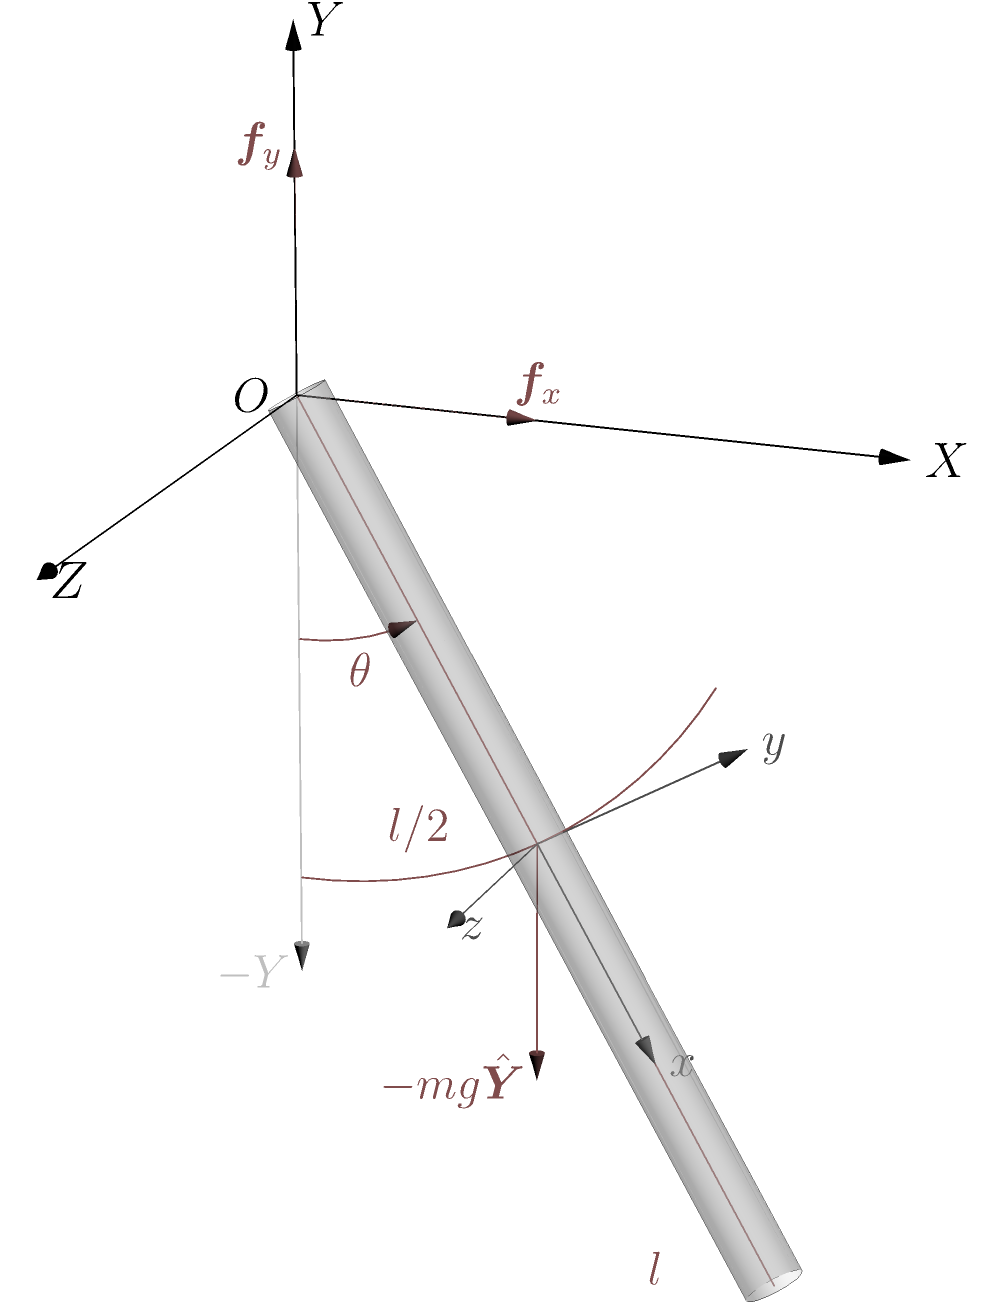

In [5]:
Image(filename='pendule_g.png', width=300)

On étudie le movement pendulare d'une barre de longueur $l$ et de masse $m$ suspendue à une de ses extrémités. On veut déterminer les forces de réaction au point de suspension (axe de rotation).

## Cinématique

Notez que le mouvement se fait dans le plan $XY$ (du repère fixe), il est donc naturel de choisir le repère fixe pour décrire ce système.

La position du centre de masse est
$$\bm R = \frac{l}{2}\big(\sin\theta \hat{\bm X} - \cos\theta \hat{\bm Y} \big)$$
et le moment d'inertie (par rapport au point $O$ de rotation) est
$$I_y = I_z = I_l = \frac{ml^2}{3}$$
La vitesse et l'accelération angulaires sont:
$$\bm \omega = \dot\theta \hat{\bm Z}, \quad \dot{\bm \omega} = \ddot\theta \hat{\bm Z}$$
La vitesse du centre de masse est
$$\bm V = \frac{\D \bm R}{\D t} =  \frac{l\dot\theta}{2}\big(\cos\theta \hat{\bm X} + \sin\theta \hat{\bm Y} \big)$$
et son accelération:
$$\dot{\bm V} = \frac{l}{2}\big[(\ddot{\theta}\cos\theta - \dot\theta^2 \sin\theta) \hat{\bm X} + (\ddot\theta \sin\theta + \dot\theta^2\cos\theta) \hat{\bm Y}\big]$$

## Moment de forces

La force total agissant sur la barre est
$$\bm F = f_x \hat{\bm X} + (f_y - mg)\hat{\bm Y}$$
Le moment correspondant est
$$M_O = \bm R \times \bm F = -\frac{mgl}{2}\sin\theta \hat{\bm Z}$$

La variation du moment cinétique est due au mouvement du centre de masse:
$$\dot{\bm L} = \frac{ml^2}{3}\ddot \theta \hat{\bm Z}$$
est aussi dirrigée selon l'axe fixe $Z$.

## Newton et Euler

L'équation de Newton $\bm F = m \dot{\bm V}$ devient
\begin{align}
f_x &= \frac{ml}{2}\big(\ddot\theta \cos\theta - \dot\theta^2 \sin\theta \big)\\
f_y &= mg + \frac{ml}{2} \big(\ddot\theta \sin\theta + \dot\theta^2 \cos\theta \big)
\end{align}

En plus, on a l'équation d'Euler (variation du moment cinétique):
$$\frac{ml^2}{3}\ddot\theta = -\frac{mgl}{2}\sin\theta \hat{\bm Z}$$
ce qui donne
$$\ddot\theta + \frac{3g}{2l}\sin\theta$$
qui est l'équation de la trajectoire du pendule.

## Application numérique

In [6]:
from scipy.integrate import solve_ivp

In [7]:
def f(t,y):
    theta, omega = y[0], y[1]
    return np.array([omega, -(3/2)*np.sin(theta)])

In [8]:
NT = 100
t_i = 0
t_f = 4*np.pi
t = np.linspace(t_i,t_f,NT)
theta_0 = np.pi/3
omega_0 = 0
y0 = np.array([theta_0,omega_0])
sol = solve_ivp(f, t_span=(t_i,t_f), y0=y0, t_eval=t)

In [9]:
theta = sol.y[0]
omega = sol.y[1]
print(np.shape(sol.t))

(100,)


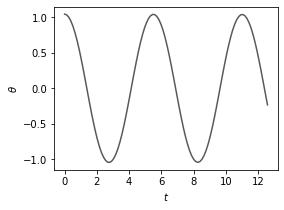

In [10]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(t, theta, color = '0.35')
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$\theta$");

In [11]:
domega = -(3/2)*np.sin(theta)
f_x = 0.5*(domega*np.cos(theta) - omega**2*np.sin(theta))
f_y = 0.5*(domega*np.sin(theta) + omega**2*np.cos(theta))

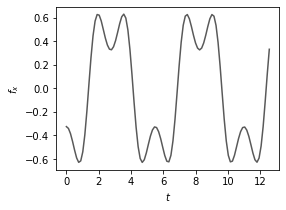

In [12]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(t, f_x, color = '0.35')
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$f_x$");

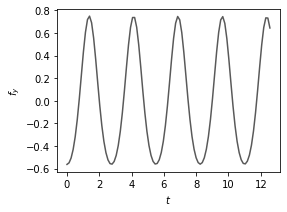

In [13]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(t, f_y, color = '0.35')
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$f_y$");

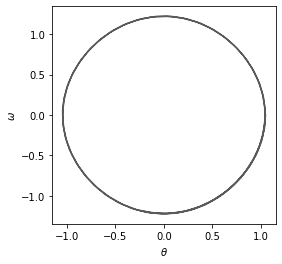

In [14]:
# Espace de phase
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(theta, omega, color = '0.35')
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\omega$");